## Milestone 1 ##
Author: Sarah Nur Syaza Binti Mohd Yunos

Matric No.: 17199299/WQD180095

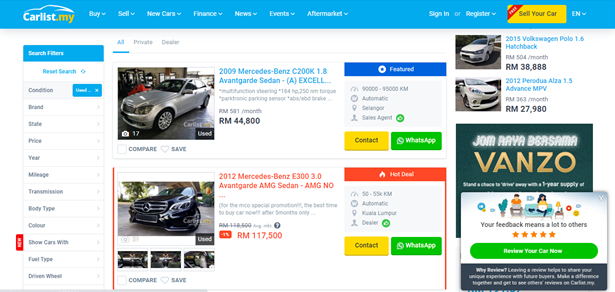

In [ ]:
import pandas as pd
import numpy as np
from time import sleep
from random import randint
import requests 
from bs4 import BeautifulSoup as soup
import warnings
warnings.warn("Warning Simulation")
from IPython.core.display import clear_output
import time 
start_time = time.time()

In [ ]:
url_test = 'https://www.carlist.my/used-cars-for-sale/malaysia'
page = requests.get(url_test)
print(page)

In [ ]:
requests = 0
pages = [str(i) for i in range(0,1)]
print(pages)

cars = []
price = []
years = []
mileages = []
transmissions =[]
makes = []
models =[]
listing_ids = []
links = []

In [ ]:
pages=0

for pages in range (0,1000):

        # Make a get request
       
        newpage = requests.get('https://www.carlist.my/used-cars-for-sale/malaysia?page_number='+str(pages)+'&page_size=25')
                 
            
        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time.time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if newpage.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, newpage.status_code))
        
        # Parse the content of the request with BeautifulSoup
     
        soup = BeautifulSoup(newpage.content, 'html.parser')

        car_list = soup.find(id="classified-listings-result")

        # For every car addtional information
        car = [c["data-display-title"] for c in car_list.select("article")]
        cars.extend (car)
              
        year = [y["data-year"] for y in car_list.select("article")]
        years.extend(year)
        
        mileage = [m["data-mileage"] for m in car_list.select("article")]
        mileages.extend(mileage)
        
        transmission = [t["data-transmission"] for t in car_list.select("article")]
        transmissions.extend(transmission)
        
        make = [mk["data-make"] for mk in car_list.select("article")]
        makes.extend(make)
        
        model = [md["data-model"] for md in car_list.select("article")]
        models.extend (model)     
             
        listing_id = [lis["data-listing-id"] for lis in car_list.select("article")]
        listing_ids.extend(listing_id)
        
        link = [url["data-url"] for url in car_list.select("article")]
        links.extend (link)

In [ ]:
print(len(models))
print(len(listing_ids))
print(len(makes))
print(len(years))
print(len(mileages))
print(len(transmissions))
print(len(links))

In [ ]:
used_cars = pd.DataFrame({'id': listing_ids,
                          'model': models, 
                          'make' : makes , 
                          'version' : cars, 
                          'year': years, 
                          'mileage': mileages, 
                          'transmission': transmissions, 
                          'link': links})
print(used_cars.info())
used_cars

In [ ]:
df=pd.DataFrame(used_cars)
df.to_csv(r'C:\Users\user\Desktop\New folder\article.csv', index=False, header=True)
df

In [ ]:
car_list = []
pages=0
for pages in range (0,1000):
    pages+=1
    url = 'https://www.carlist.my/used-cars-for-sale/malaysia?page_number='+str(pages)+'&page_size=25'
    page2 = requests.get(url)
    soup2 = soup(page2.content, 'html.parser')
    user_data = soup2.find_all('div', attrs={'class' : 'grid grid--full cf'})
    if user_data!=[]:
        for item in user_data:
            d={}            
                     
            try:
                d['Price'] = item.find('div',{'class' : 'listing__price delta weight--bold'}).text
            except:
                d['Price']= "NA" 
            
            try:
                d['link'] = item.find('a', href=True).get('href')
            except:
                d['link']= "NA"   
            
            car_list.append(d)

In [ ]:
df1=pd.DataFrame(car_list)
df1.to_csv(r'C:\Users\user\Desktop\New folder\price.csv', index=False, header=True)
df1

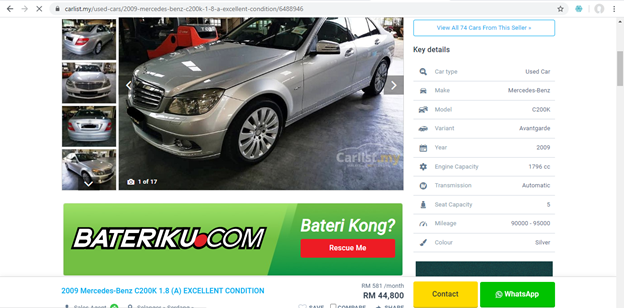

In [ ]:
additional=[]
allref= df1['link']

for ref in allref:
    page3=requests.get(ref+'#spec')
    soup3=soup(page3.content,'html.parser')
    car_data=soup3.find_all('div', class_='listing__key-listing__list')
    if car_data!=[]:
        for items in car_data:
            e={}
            e['link']=ref
            
            try:
                e['Engine Capacity']=items.find('span', text='Engine Capacity').find_next('span').text
            except:
                e['Engine Capacity']="NA"
            try:
                e['Seat Capacity']=items.find('span', text='Seat Capacity').find_next('span').text
            except:
                e['Seat Capacity']="NA"
            try:
                e['Colour']=items.find('span', text='Colour').find_next('span').text
            except:
                e['Colour']="NA"

            additional.append(e)

In [ ]:
df2=pd.DataFrame(additional)
df2

In [ ]:
df3= df2.drop_duplicates(subset='link', keep="first")

In [ ]:
df3.to_csv(r'C:\Users\user\Desktop\New folder\additional.csv', index=False, header=True)

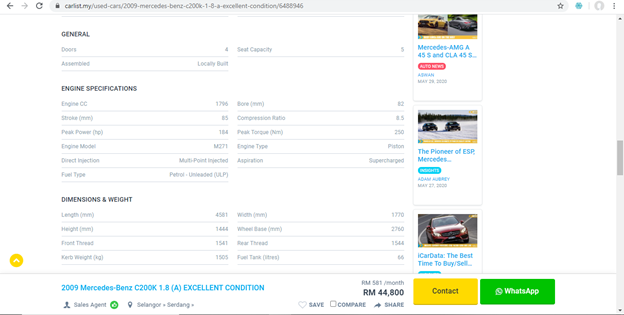

In [ ]:
extra =[]
allref= df1['link']

for ref in allref:
        
    page3=requests.get(ref+'#spec')
    soup3=soup(page3.content,'html.parser')
    car_data=soup3.find_all('div', class_='listing__section listing__section--specs-equipments listing__specs-equipments push--bottom print-page-break')
    if car_data!=[]:
        for items in car_data:
            f={}
            f['link']=ref
            
            try:
                f['Bore(mm)']=items.find('span', text='Bore (mm)').find_next('span').text
            except:
                f['Bore(mm)']="NA"
                
            try:
                f['Stroke(mm)']=items.find('span', text='Stroke (mm)').find_next('span').text
            except:
                f['Stroke(mm)']="NA"
                
            try:
                f['Power(hp)']=items.find('span', text='Peak Power (hp)').find_next('span').text
            except:
                f['Power(hp)']="NA"
                
            try:
                f['Compression Ratio']=items.find('span', text='Compression Ratio').find_next('span').text
            except:
                f['Compression Ratio']="NA"
                
            try:
                f['Peak Torque(Nm)']=items.find('span', text='Peak Torque (Nm)').find_next('span').text
            except:
                f['Peak Torque(Nm)']="NA"
                
            try:
                f['Length(mm)']=items.find('span', text='Length (mm)').find_next('span').text
            except:
                f['Length(mm)']="NA"
                
            try:
                f['Width(mm)']=items.find('span', text='Width (mm)').find_next('span').text
            except:
                f['Width(mm)']="NA"
                
            try:
                f['Height(mm)']=items.find('span', text='Height (mm)').find_next('span').text
            except:
                f['Heigth(mm)']="NA"
                
            try:
                f['Fuel Tank (litres)']=items.find('span', text='Fuel Tank (litres)').find_next('span').text
            except:
                f['Fuel Tank (litres)']="NA"

            extra.append(f)

In [ ]:
df4=pd.DataFrame(extra)
df4.to_csv(r'C:\Users\user\Desktop\New folder\extra.csv', index=False, header=True)